# Load celltypist results

In [5]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from pathlib import Path
#from insitupy import InSituData, InSituExperiment, CACHE
import scanpy as sc
from tqdm import tqdm
import anndata
import pandas as pd
import numpy as np
import warnings

## Reload after celltypist run

In [7]:
#adata_path = Path("D:/ColorectalCancer/analysis/adata_export/")
#data_path = Path("/dss/dssfs02/lwp-dss-0001/pn57fo/pn57fo-dss-0000/projects/2301-CRC/celltypist/results_5000.h5ad")
#data_path = Path("/dss/dssfs02/lwp-dss-0001/pn57fo/pn57fo-dss-0000/projects/2301-CRC/celltypist/results_5000_rounded_1e2.h5ad")
#data_path = Path("/dss/dssfs02/lwp-dss-0001/pn57fo/pn57fo-dss-0000/projects/2301-CRC/celltypist/results_5000_1e2.h5ad")
data_path = Path("/dss/dssfs02/lwp-dss-0001/pn57fo/pn57fo-dss-0000/projects/2301-CRC/celltypist/results/celltypist_rounded_5000_1e2.h5ad")
adata1e2 = sc.read(data_path)
# data_path = Path("/dss/dssfs02/lwp-dss-0001/pn57fo/pn57fo-dss-0000/projects/2301-CRC/celltypist/results_5000_rounded_1e4.h5ad")
# adata1e4 = sc.read(data_path)

# # copy probabilities to obsm
# conf_score_id = np.where(adata.obs.columns == "conf_score")[0][0]+1
# adata.obsm["celltypist_probs"] = adata.obs.iloc[:, conf_score_id:]

# # remove probabilities from obs
# adata.obs = adata.obs.iloc[:, 0:conf_score_id]

In [8]:
adata1e2

AnnData object with n_obs × n_vars = 1018411 × 280
    obs: 'original_cell_id', 'centroid_x', 'centroid_y', 'centroid_z', 'fov', 'cluster', 'volume', 'scale', 'population', 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes', 'uid', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'gene_names', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'neighbors', 'over_clustering'
    obsm: 'X_pca', 'spatial'
    layers: 'counts', 'counts_proseg', 'counts_rounded', 'log1p', 'norm_counts', 'scaled_log1p'
    obsp: 'connectivities', 'distances'

In [9]:
import matplotlib.pyplot as plt
import scanpy as sc

def plot_all_uids(adata, color: str, groupby="uid", spot_size=10, ncols=4):
    uids = sorted(adata.obs[groupby].unique())
    nrows = (len(uids) + ncols - 1) // ncols  # Calculate number of rows needed
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    for i, uid in enumerate(uids):
        ax = axes[i]
        sc.pl.spatial(adata[adata.obs[groupby] == uid], color=color, spot_size=spot_size, ax=ax, show=False, legend_loc=None)
        ax.set_title(f'UID: {uid}')
    
    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

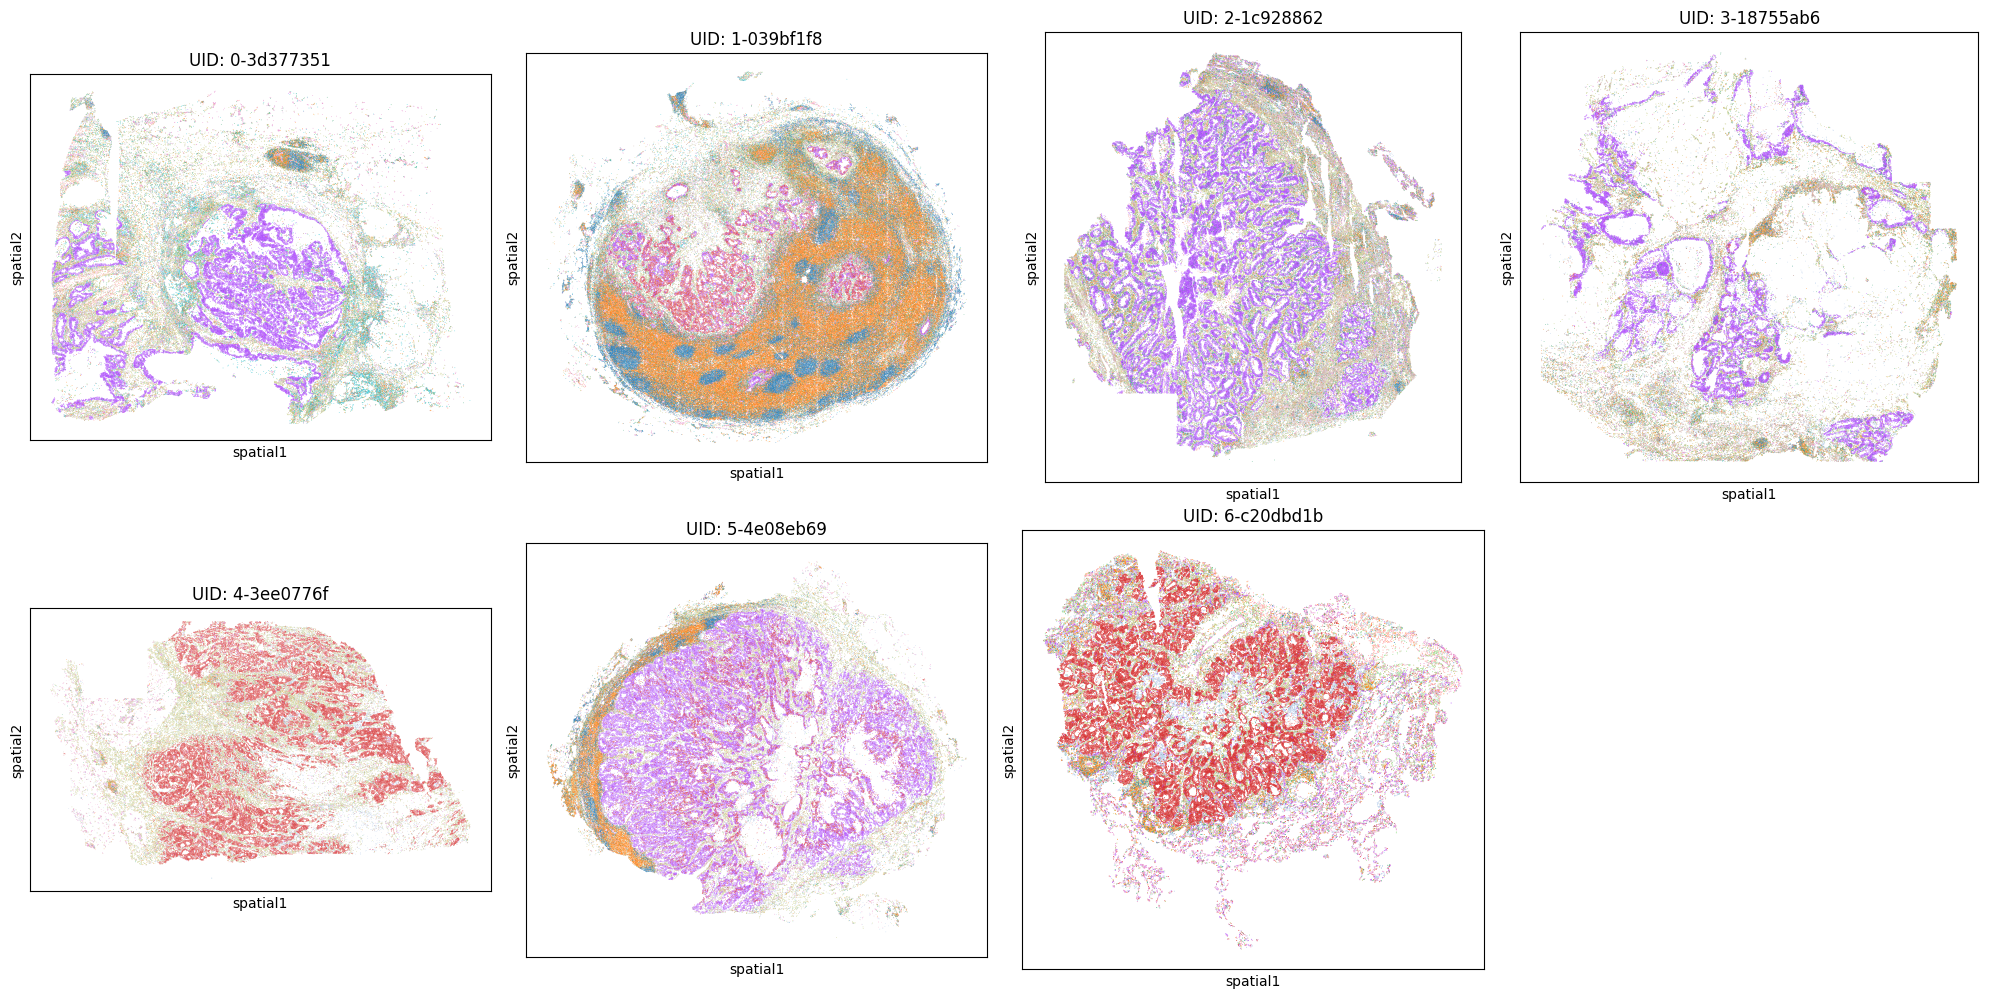

In [10]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Example usage
    plot_all_uids(adata1e2, color="majority_voting")

/tmp/ipykernel_4065715/3352862358.py:3: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata[adata.obs["uid"] == uid], color=["majority_voting", "predicted_labels"], spot_size=10, ncols=1)
/dss/dsshome1/0C/ge37voy2/miniconda3/envs/scvi/lib/python3.12/site-packages/scanpy/plotting/_utils.py:491: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


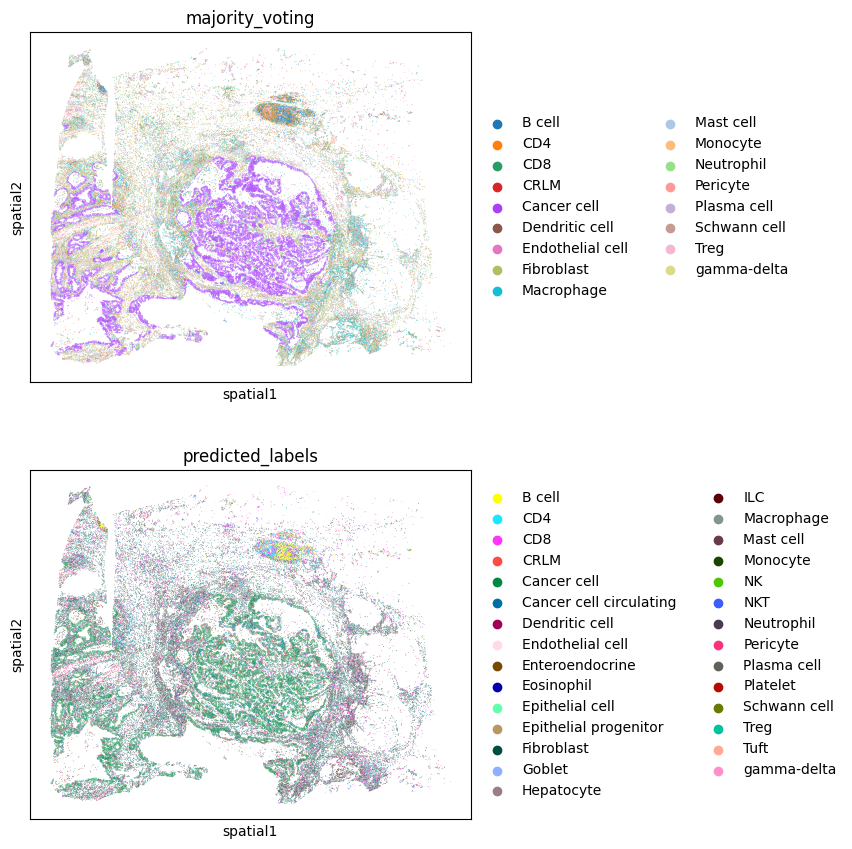

In [11]:
adata = adata1e2
uid = sorted(adata.obs["uid"].unique())[0]
sc.pl.spatial(adata[adata.obs["uid"] == uid], color=["majority_voting", "predicted_labels"], spot_size=10, ncols=1)

In [12]:
sample = sc.pp.sample(adata1e2, fraction=0.1, copy=True)

In [13]:
sample

AnnData object with n_obs × n_vars = 101841 × 280
    obs: 'original_cell_id', 'centroid_x', 'centroid_y', 'centroid_z', 'fov', 'cluster', 'volume', 'scale', 'population', 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes', 'uid', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'gene_names', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'neighbors', 'over_clustering'
    obsm: 'X_pca', 'spatial'
    layers: 'counts', 'counts_proseg', 'counts_rounded', 'log1p', 'norm_counts', 'scaled_log1p'
    obsp: 'connectivities', 'distances'

In [14]:
adata = sample
print("Perform PCA...", flush=True)
sc.pp.pca(adata)

print("Calculate neighbors...", flush=True)
# calculate neighbors
sc.pp.neighbors(adata)

print("Perform UMAP...", flush=True)
# dimensionality reduction
sc.tl.umap(adata)

print("Perform Leiden clustering...", flush=True)
# leiden clustering
sc.tl.leiden(adata)

Perform PCA...
Calculate neighbors...


/dss/dsshome1/0C/ge37voy2/miniconda3/envs/scvi/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Perform UMAP...
Perform Leiden clustering...


/tmp/ipykernel_4065715/2372987789.py:15: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


In [15]:
adata

AnnData object with n_obs × n_vars = 101841 × 280
    obs: 'original_cell_id', 'centroid_x', 'centroid_y', 'centroid_z', 'fov', 'cluster', 'volume', 'scale', 'population', 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes', 'uid', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden'
    var: 'gene_names', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'neighbors', 'over_clustering', 'pca', 'umap', 'leiden'
    obsm: 'X_pca', 'spatial', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'counts_proseg', 'counts_rounded', 'log1p', 'norm_counts', 'scaled_log1p'
    obsp: 'connectivities', 'distances'

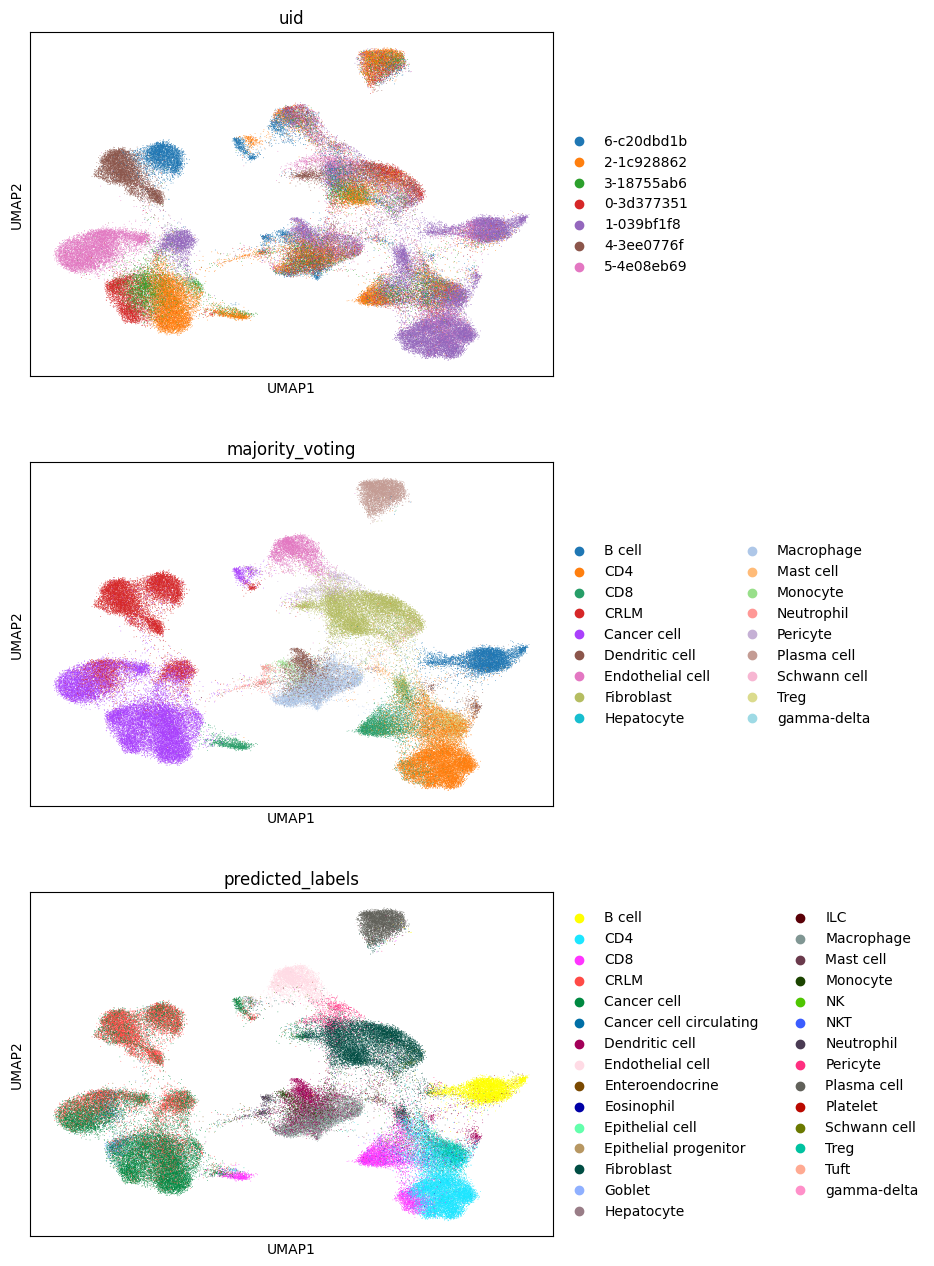

In [16]:
sc.pl.umap(adata, color=["uid", "majority_voting", "predicted_labels"], ncols=1)

## Summarize the terms CRLM and Cancer cell into one term "Cancer cell"

In [17]:
adata1e2.obs["majority_voting_simple"] = adata1e2.obs["majority_voting"].str.replace("CRLM", "Cancer cell")

In [18]:
adata1e2.write(data_path)

In [25]:
adata1e2.obs["majority_voting_simple"].value_counts()

majority_voting_simple
Cancer cell         318558
Fibroblast           88299
Macrophage           49507
CD4                  42370
CD8                  34503
Plasma cell          31430
Dendritic cell       29182
Endothelial cell     26115
B cell               21936
Treg                 15601
Monocyte              6759
Pericyte              5393
Mast cell             1748
Schwann cell          1039
Enteroendocrine        939
Name: count, dtype: int64

In [4]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix

In [5]:
adjusted_rand_score(adata1e2.obs["majority_voting"].values, adata1e4.obs["majority_voting"].values)

0.7442672552104075

In [6]:
a = adata1e2.obs["majority_voting"].values
b = adata1e4.obs["majority_voting"].values
conf_matrix = confusion_matrix(a, b)

In [92]:
import seaborn as sns

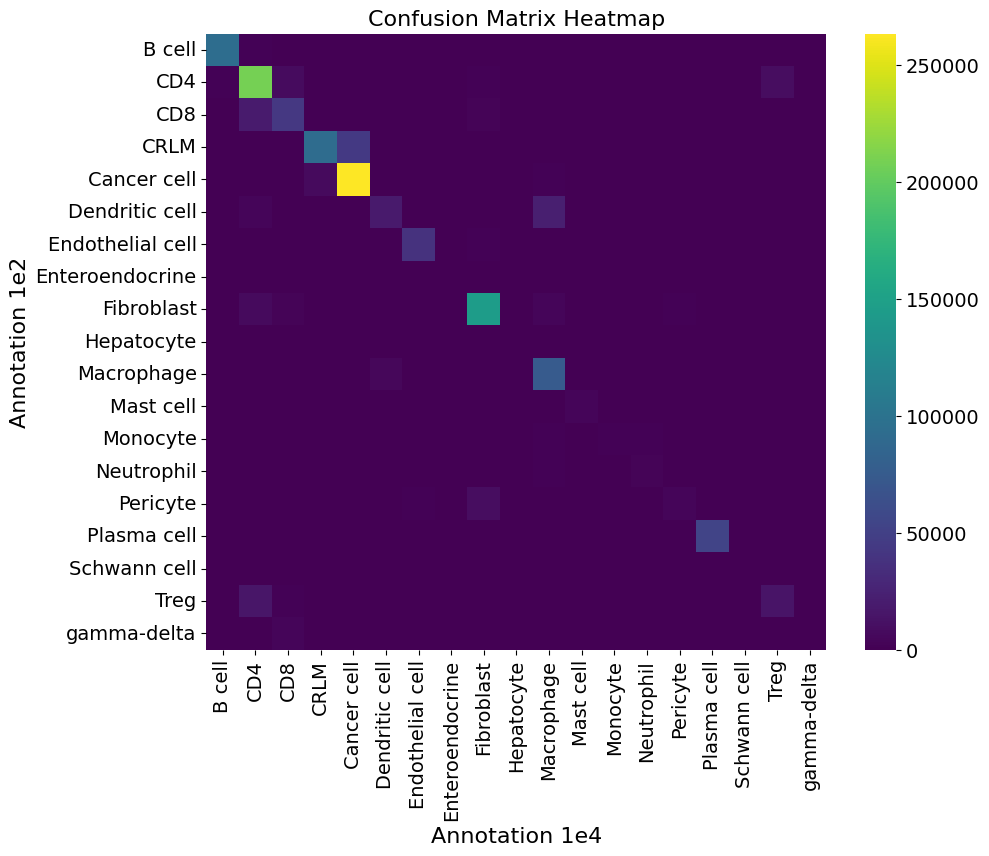

In [97]:
# Convert confusion matrix to DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=a.categories, columns=a.categories)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, #annot=True, fmt='d', 
            cmap='viridis')
plt.xlabel('Annotation 1e4')
plt.ylabel('Annotation 1e2')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [56]:
adata1e2.obs["majority_voting"]

596056f7-0         Cancer cell
596056f7-1          Fibroblast
596056f7-2         Cancer cell
596056f7-3         Cancer cell
596056f7-4         Cancer cell
                      ...     
798fd210-471591            CD8
798fd210-471592            CD4
798fd210-471597       Pericyte
798fd210-471598            CD4
798fd210-471600            CD4
Name: majority_voting, Length: 1252882, dtype: category
Categories (19, object): ['B cell', 'CD4', 'CD8', 'CRLM', ..., 'Plasma cell', 'Schwann cell', 'Treg', 'gamma-delta']

In [54]:
adata1e4.obs["majority_voting"]

596056f7-0              Cancer cell
596056f7-1               Fibroblast
596056f7-2              Cancer cell
596056f7-3              Cancer cell
596056f7-4              Cancer cell
                         ...       
798fd210-471591                 CD4
798fd210-471592                 CD4
798fd210-471597    Endothelial cell
798fd210-471598                 CD4
798fd210-471600                 CD4
Name: majority_voting, Length: 1252882, dtype: category
Categories (17, object): ['B cell', 'CD4', 'CD8', 'CRLM', ..., 'Pericyte', 'Plasma cell', 'Schwann cell', 'Treg']

In [5]:
adata.obs

,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,total_counts,cell_area,nucleus_area,n_genes_by_counts,n_genes,uid,...,NK,NKT,Neutrophil,Pericyte,Plasma cell,Platelet,Schwann cell,Treg,Tuft,gamma-delta
13613e64-aaabcimi-1,16,0,0,0,16.0,36.350781,7.270156,14,14,13613e64,...,1.338305e-02,1.210536e-05,1.108691e-07,0.000248,1.018471e-05,8.091175e-06,0.000322,4.206278e-03,6.978635e-03,6.508614e-10
13613e64-aaabffej-1,67,0,0,0,67.0,190.649687,34.138125,38,38,13613e64,...,6.179769e-08,2.941944e-10,9.449067e-10,0.005679,8.291479e-09,1.665460e-10,0.000207,3.455293e-04,2.793201e-05,2.588003e-09
13613e64-aaacannb-1,78,0,0,0,78.0,157.279219,27.364688,39,39,13613e64,...,2.778384e-08,3.089558e-08,5.650276e-06,0.000413,3.021911e-08,2.510927e-08,0.000121,2.579525e-03,1.767346e-06,1.013081e-10
13613e64-aaacjbge-1,89,0,0,0,89.0,157.595313,24.926250,45,45,13613e64,...,4.503197e-13,1.454837e-05,3.527665e-08,0.000334,1.665495e-07,2.067290e-05,0.004847,3.401572e-04,9.363667e-06,2.126610e-07
13613e64-aaackdnh-1,87,0,0,0,87.0,224.787813,12.056719,32,32,13613e64,...,1.766943e-06,3.723859e-13,4.765490e-08,0.035571,7.746590e-11,3.606139e-09,0.006794,8.037057e-05,1.429226e-05,1.365046e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99afae32-oiiglihk-1,184,0,0,0,184.0,498.570156,27.455000,68,68,99afae32,...,1.609093e-06,6.991874e-08,2.972103e-09,0.001855,1.957847e-09,1.805185e-07,0.000717,2.213462e-07,1.588620e-07,3.914953e-12
99afae32-oiigpnjl-1,85,0,0,0,85.0,444.292344,26.642188,45,45,99afae32,...,1.051492e-06,1.223033e-06,7.316275e-11,0.002795,7.180821e-09,1.678965e-07,0.001396,2.410733e-06,1.982465e-07,1.772417e-13
99afae32-oiihddmo-1,52,0,0,0,52.0,398.368438,22.352344,37,37,99afae32,...,3.136243e-08,8.187148e-08,5.522128e-07,0.022809,1.299189e-06,4.359496e-11,0.000685,2.892636e-05,5.128233e-07,1.434202e-05
99afae32-oiiidcmo-1,77,0,0,0,77.0,502.182656,31.654531,39,39,99afae32,...,2.969454e-06,2.767209e-10,2.625933e-10,0.004302,1.004296e-10,1.335700e-08,0.005275,9.281521e-06,6.938384e-08,3.294490e-09
